In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Data Loading & Cleaning

In [2]:
csv_path = "results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
- Filtering rows to dominant 'total_generated_tokens' = 16384
- Retained 88 of 90 rows
- Dropped configs: ['batching_1', 'batching_2']
- Dropped row indices: [4, 5]
Original distribution:
total_generated_tokens
14659     1
16284     1
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ FLOPs value is constant: 16949970993152
Original distribution:
flops
16949970993152    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:515: UserWarning: ⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
  df = filter_by_dominant_token_count(df)


In [3]:
cols_to_describe = [
    'total_energy_kwh',
    'total_inference_time_sec',
    'average_latency_ms_per_batch',
    'throughput_queries_per_sec',
    'throughput_tokens_per_sec',
    'cpu_energy_total',
    'gpu_energy_total',
    'flops_per_token',
    'energy_per_token_kwh',
    'divergence_energy_flops'
]

df[cols_to_describe].describe()

,total_energy_kwh,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,cpu_energy_total,gpu_energy_total,flops_per_token,energy_per_token_kwh,divergence_energy_flops
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,8.800000e+01
mean,0.021104,38.438732,4662.541943,3.573381,457.392832,0.004661,0.016412,1.034544e+09,1.288077e-06,1.245067e-15
std,0.005771,13.666694,558.983884,1.217770,155.874513,0.001752,0.004104,0.000000e+00,3.522471e-07,3.404853e-16
min,0.003973,9.628563,2868.194596,0.867697,111.065177,0.001194,0.002724,1.034544e+09,2.425090e-07,2.344114e-16
25%,0.021053,36.740853,4593.879790,3.428112,438.798308,0.004547,0.016461,1.034544e+09,1.284950e-06,1.242045e-15
50%,0.021162,37.063840,4633.730808,3.453501,442.048106,0.004574,0.016542,1.034544e+09,1.291647e-06,1.248518e-15
75%,0.021235,37.338340,4667.292441,3.483860,445.934128,0.004598,0.016604,1.034544e+09,1.296080e-06,1.252803e-15
max,0.064102,147.516985,9029.341061,13.293780,1701.603812,0.018196,0.045785,1.034544e+09,3.912481e-06,3.781841e-15


# Exploratory Data Analysis (EDA)

⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
- Filtering rows to dominant 'total_generated_tokens' = 16384
- Retained 88 of 90 rows
- Dropped configs: ['batching_1', 'batching_2']
- Dropped row indices: [4, 5]
Original distribution:
total_generated_tokens
14659     1
16284     1
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ FLOPs value is constant: 16949970993152
Original distribution:
flops
16949970993152    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:515: UserWarning: ⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
  df = filter_by_dominant_token_count(df)


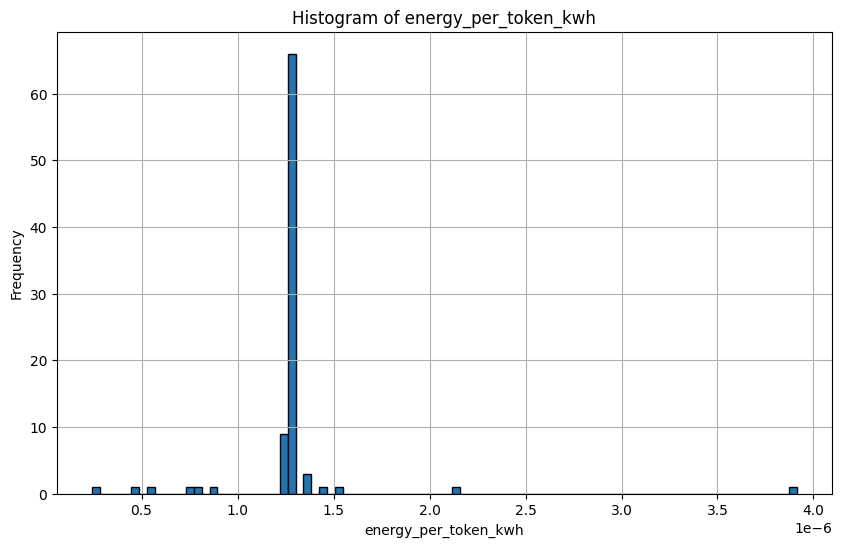

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:17: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(data[column].dropna(), vert=False)


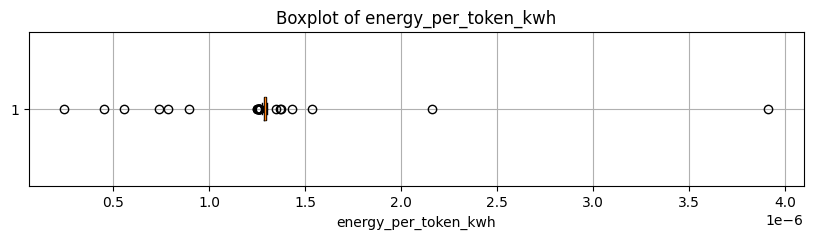

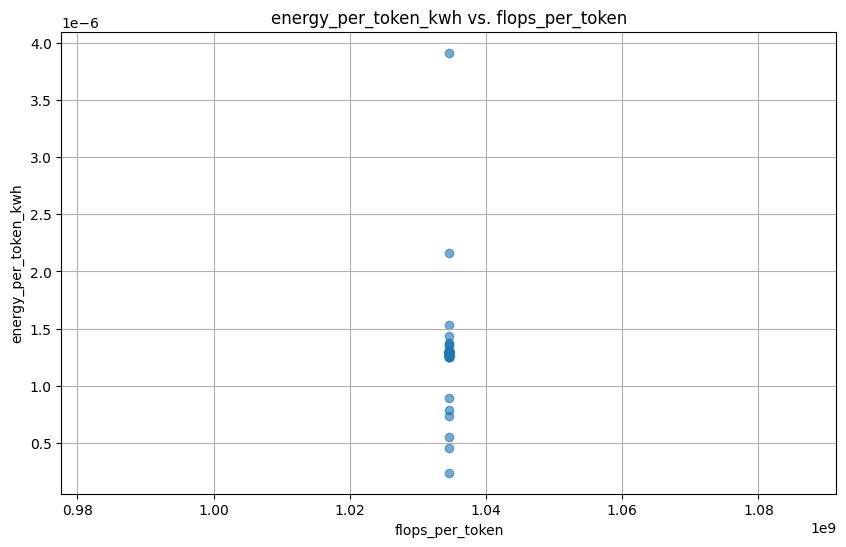

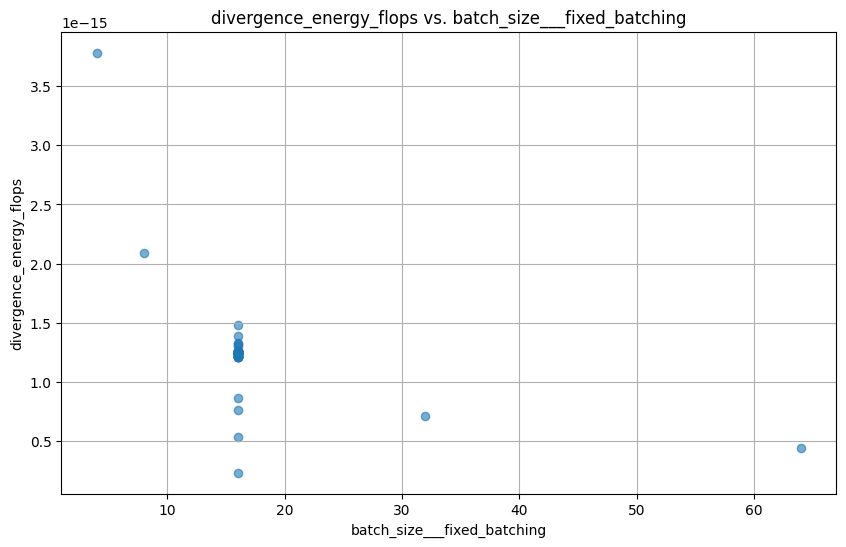

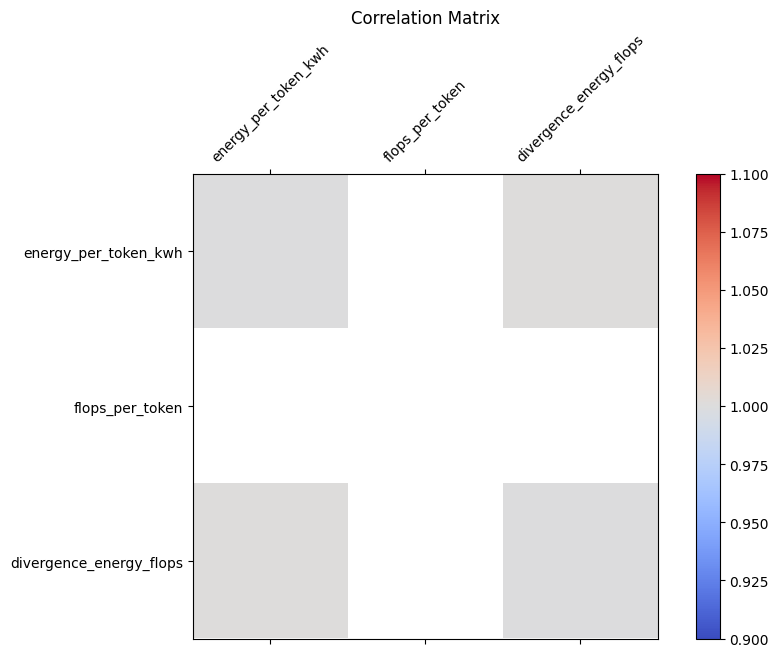

In [4]:
%run scripts/b_exploratory_data_analysis.py

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] also plot more 

# Controlled Experiment Visualisation

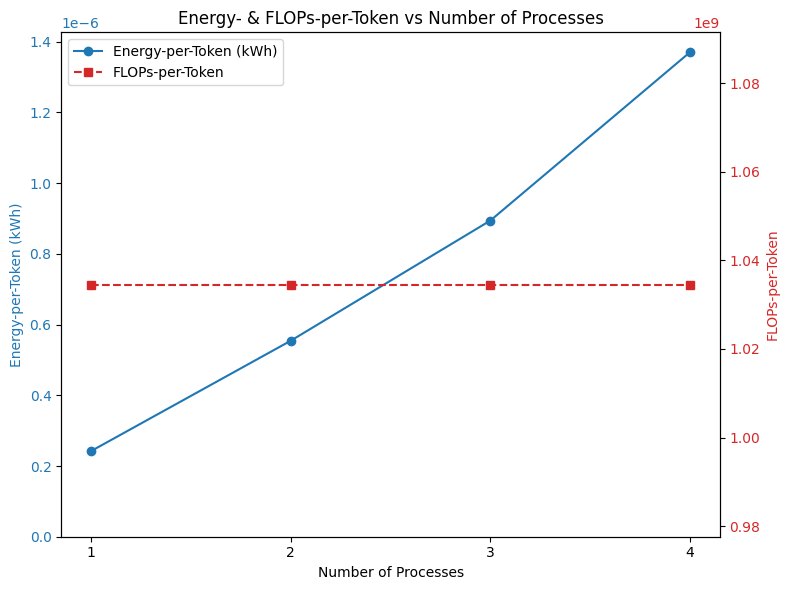

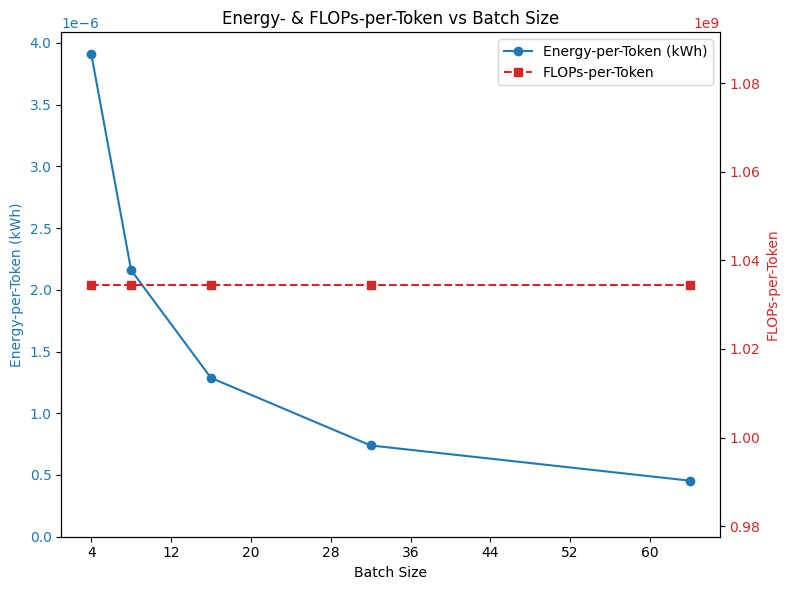

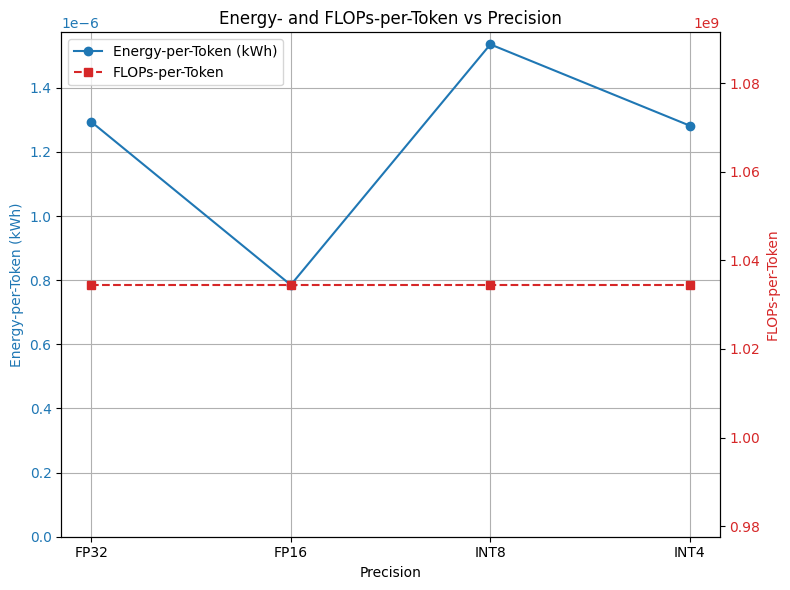

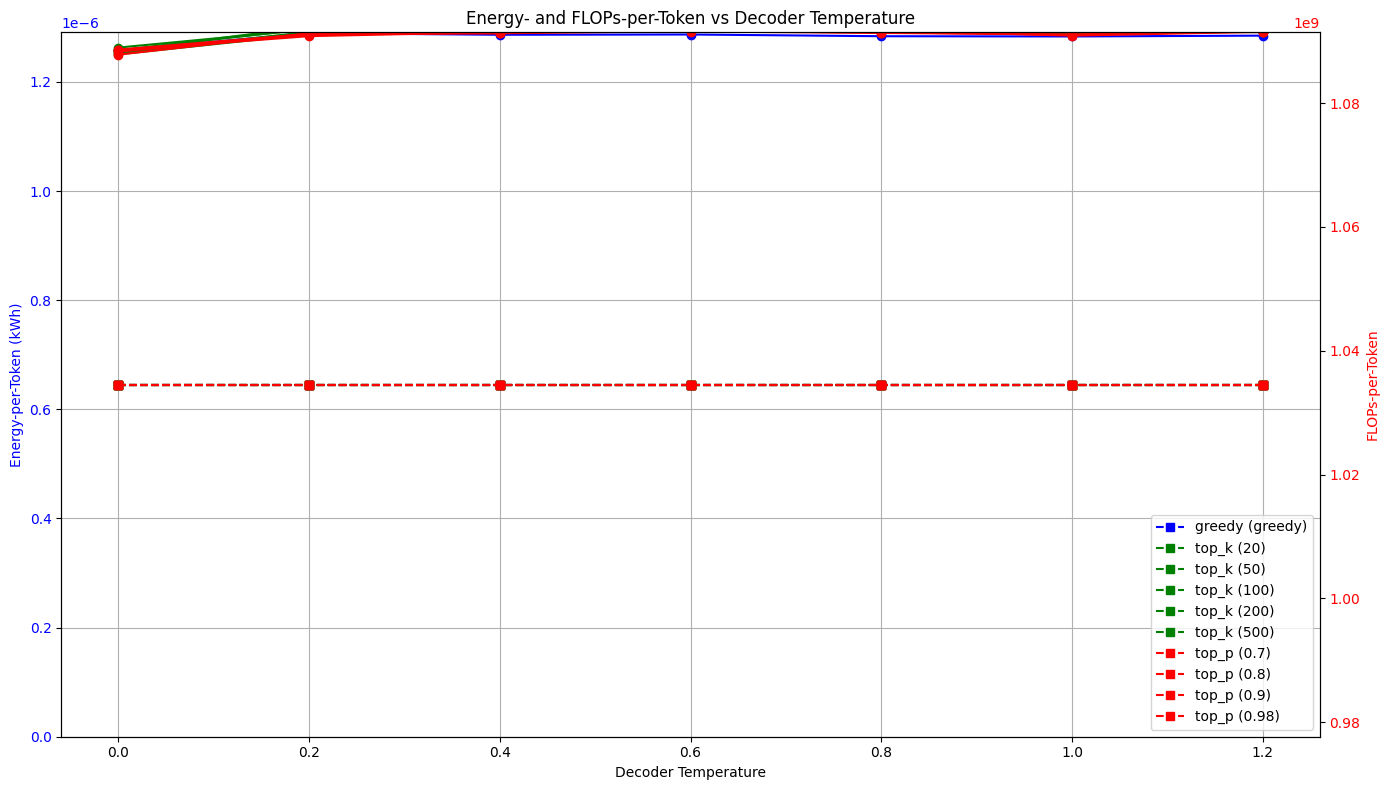

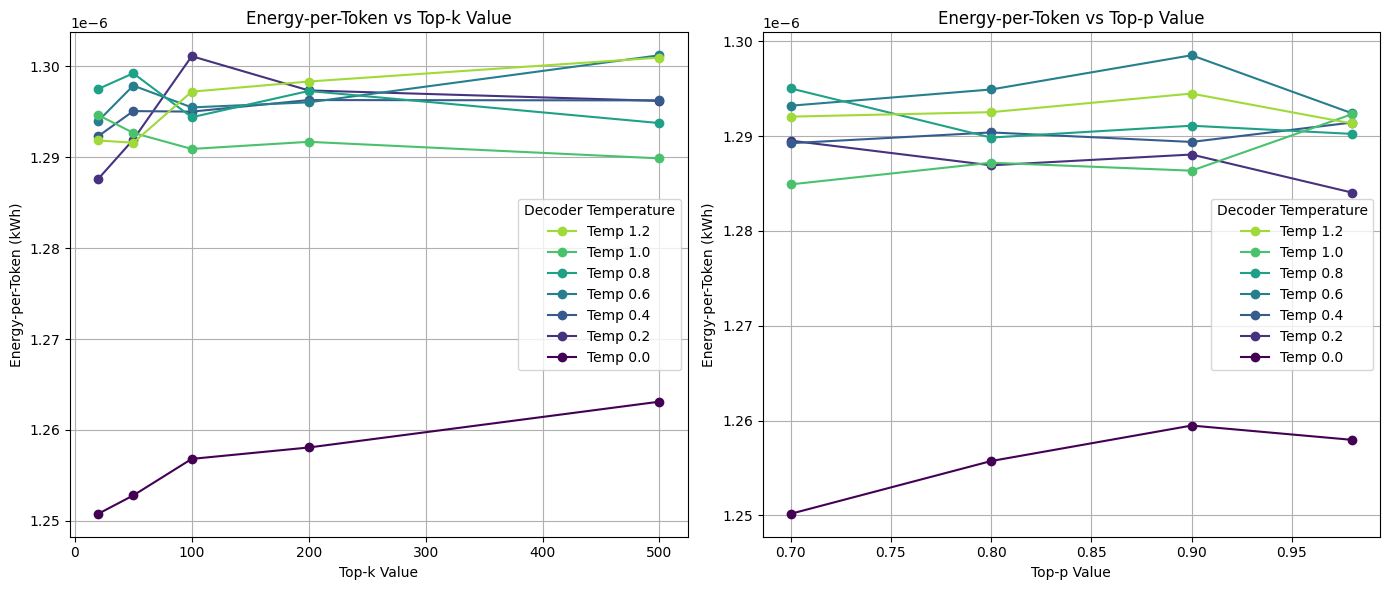

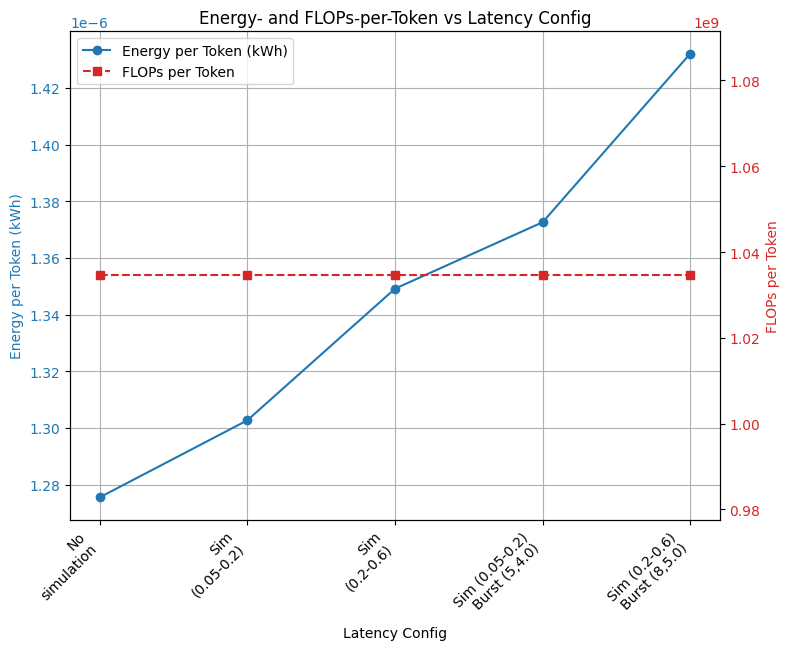

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:413: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  energy_pivot = latency_df.pivot_table(
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:419: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flops_pivot = latency_df.pivot_table(


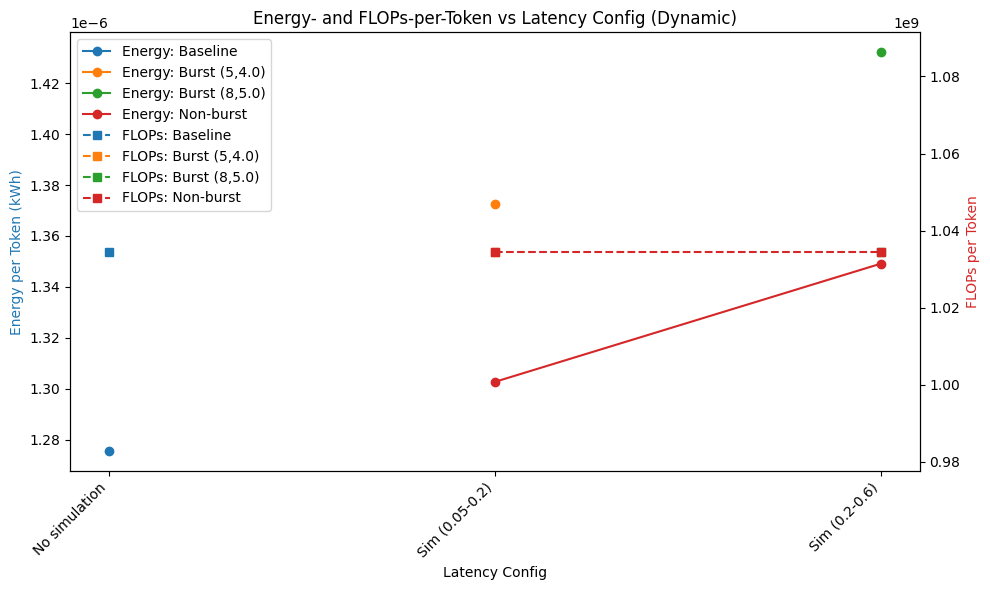

In [28]:
from scripts.c_controlled_exp_visualisations import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    plot_decoder_temperature,
    plot_decoder_topk_top_p,
    plot_latency,
    plot_latency_dynamic,
    plot_all,
)

configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

plot_all(dfs)

to do:
- [ ] don't treat no simulation and simulation as categorically distinct, rather they are on a continuous number line, and the plots should reflect that
- [ ] get FLOPs to print just once, and the legend to only be taken from one axis 

# Modeling

In [ ]:
%run scripts/c_base_regression.py

ImportError: cannot import name 'get_cleaned_df' from 'scripts.a_data_loading_cleaning' (/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py)

In [ ]:
%run scripts/d_mixed_effects_model.py

ImportError: cannot import name 'df_controlled_cleaned' from 'scripts.a_data_loading_cleaning' (/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py)

To do
- [ ] identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 